In [98]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

# DTSC Project 2: 
* Name: Jason Ortiz
* NYIT ID: 1258640
* Due: 12/12/2022 @ 11:59PM
* Professor: Kiran Balgani

In [99]:
original_spam_df = pd.read_csv('spam.csv', sep=',')

In [100]:
original_spam_df

,make,address,all,3d,our,over,remove,internet,order,mail,...,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total,Class
0,0.00,0.00,0.29,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.178,0.0,0.044,0.000,0.00,1.666,10,180,ham
1,0.46,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.125,0.0,0.000,0.000,0.00,1.510,10,74,ham
2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.718,11,55,ham
3,0.33,0.44,0.37,0.0,0.14,0.11,0.00,0.07,0.97,1.16,...,0.006,0.159,0.0,0.069,0.221,0.11,3.426,72,819,spam
4,0.00,2.08,0.00,0.0,3.12,0.00,1.04,0.00,0.00,0.00,...,0.000,0.000,0.0,0.263,0.000,0.00,1.428,4,20,spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.00,0.53,0.0,0.00,0.53,0.00,0.00,0.00,0.53,...,0.000,0.101,0.0,0.000,0.000,0.00,1.857,16,52,ham
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.443,0.0,0.221,0.665,0.00,3.812,15,61,spam
4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.000,0.000,0.00,1.000,1,3,ham
4599,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.218,0.0,0.218,0.000,0.00,1.687,10,27,ham


In [101]:
original_spam_df.shape

(4601, 58)

In [102]:
original_spam_df.describe()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [103]:
original_spam_df["Class"].unique()

array(['ham', 'spam'], dtype=object)

Indicates this is a Binary Classification Problem ^

In [104]:
non_class_features = original_spam_df.columns.delete(-1)
non_class_features

Index(['make', 'address', 'all', '3d', 'our', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'you', 'credit', 'your', 'font', '0',
       'money', 'hp', 'hpl', 'george', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'technology', '1999', 'parts', 'pm', 'direct',
       'cs', 'meeting', 'original', 'project', 're', 'edu', 'table',
       'conference', 'semicol', 'paren', 'bracket', 'bang', 'dollar', 'pound',
       'cap_avg', 'cap_long', 'cap_total'],
      dtype='object')

In [105]:
spam_training_set, spam_test_set = train_test_split(original_spam_df, test_size=0.7826559, random_state=99)

In [106]:
spam_training_data, spam_training_target = spam_training_set[non_class_features], spam_training_set['Class']
spam_test_data, spam_test_target = spam_test_set[non_class_features], spam_test_set['Class']

In [107]:
print(f'{spam_training_data.shape = }\n{spam_test_data.shape = }')

spam_training_data.shape = (1000, 57)
spam_test_data.shape = (3601, 57)


In [108]:
spam_training_data.head()
#spam_training_target.head()
#spam_test_data.head()
#spam_test_target.head()

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
466,0.00,0.0,0.87,0.0,0.00,0.0,0.00,0.0,0.00,0.87,...,0.0,0.0,0.608,0.0,0.000,0.000,0.0,2.941,11,100
1663,0.00,0.0,0.44,0.0,1.32,0.0,0.44,0.0,0.00,1.32,...,0.0,0.0,0.301,0.0,0.301,0.000,0.0,2.787,19,131
46,0.00,0.0,1.58,0.0,0.00,0.0,0.00,0.0,0.00,0.00,...,0.0,0.0,0.149,0.0,0.149,0.000,0.0,1.482,10,43
3499,0.33,0.0,1.65,0.0,0.99,0.0,0.33,0.0,0.66,1.32,...,0.0,0.0,0.000,0.0,0.859,0.101,0.0,337.250,1146,1349
1163,0.00,0.0,0.31,0.0,0.00,0.0,0.00,0.0,0.00,0.00,...,0.0,0.0,0.588,0.0,0.000,0.000,0.0,3.183,55,191


In [109]:
def rate_classifier(test_target_data, test_target_predict):
    cm = confusion_matrix(test_target_data, test_target_predict)

    terminology = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
    counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    percentages = ["{0:0.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(terminology, counts, percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(10,7))
    sb.heatmap(cm/np.sum(cm), annot=labels, fmt='', cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')

    print("Classification Report\n", classification_report(test_target_data, test_target_predict))

    print("Accuracy Score\n", accuracy_score(test_target_data, test_target_predict))

## Fused Majority Voting Rule Classifier

In [110]:
decision_tree_classifier = DecisionTreeClassifier().fit(spam_training_data, spam_training_target)
gauss_nb_MJVT = GaussianNB().fit(spam_training_data, spam_training_target)
# max_iter of 1191 required for Logistic Regression to Converge
logistic_regression_MJVT = LogisticRegression(max_iter=1191).fit(spam_training_data, spam_training_target)

In [111]:
majority_voting_classifier = VotingClassifier(estimators=[('DT', decision_tree_classifier), ('GNB', gauss_nb_MJVT), ('LR', logistic_regression_MJVT)], voting='hard')
majority_voting_classifier = majority_voting_classifier.fit(spam_training_data, spam_training_target)
majority_voting_classifier_predict = majority_voting_classifier.predict(spam_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.93      0.94      2188
        spam       0.90      0.91      0.90      1413

    accuracy                           0.92      3601
   macro avg       0.92      0.92      0.92      3601
weighted avg       0.92      0.92      0.92      3601

Accuracy Score
 0.9233546237156346


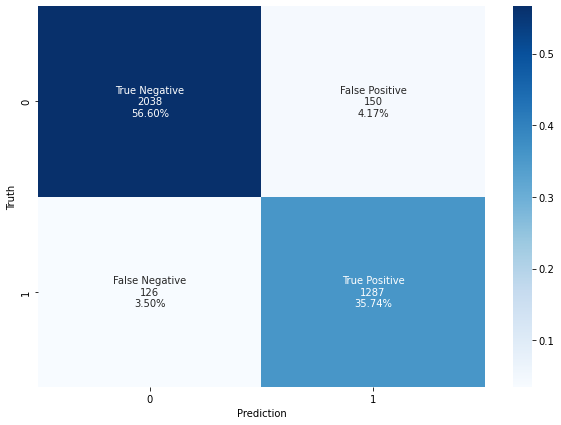

In [112]:
rate_classifier(spam_test_target, majority_voting_classifier_predict)

## Task 1 
Compare the accuracies of the fused model with AdaBoost Ensemble with Decision Tree as the base learner. Train the classifiers using the first 1000 instances and use the remaining 3601 for testing. [25 points]

In [113]:
ada_boost_classifier = AdaBoostClassifier(base_estimator=decision_tree_classifier).fit(spam_training_data, spam_training_target)
ada_boost_classifier_predict = ada_boost_classifier.predict(spam_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.90      0.91      0.90      2188
        spam       0.85      0.85      0.85      1413

    accuracy                           0.88      3601
   macro avg       0.88      0.88      0.88      3601
weighted avg       0.88      0.88      0.88      3601

Accuracy Score
 0.8836434323798945


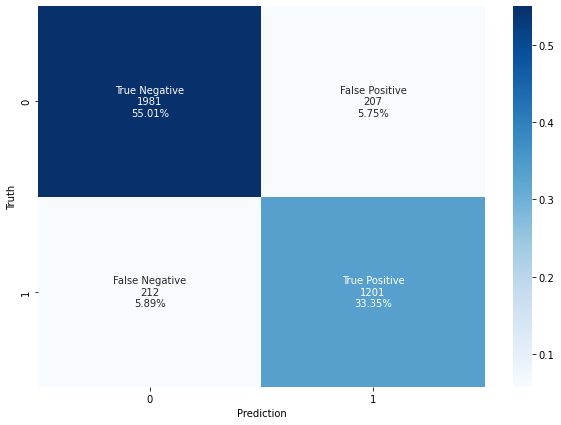

In [114]:
rate_classifier(spam_test_target, ada_boost_classifier_predict)

Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.93      0.94      2188
        spam       0.90      0.91      0.90      1413

    accuracy                           0.92      3601
   macro avg       0.92      0.92      0.92      3601
weighted avg       0.92      0.92      0.92      3601

Accuracy Score
 0.9233546237156346


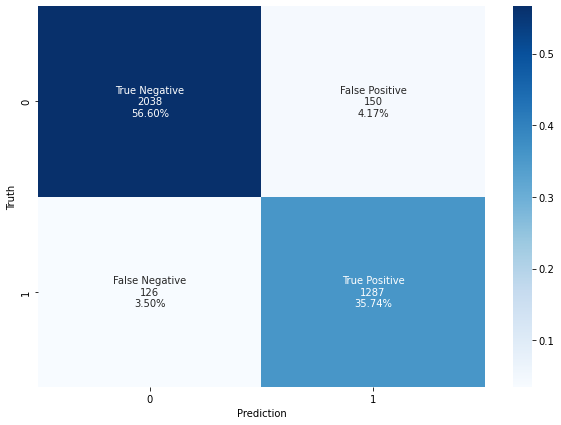

In [115]:
rate_classifier(spam_test_target, majority_voting_classifier_predict)

The Majority Voting Classifier performed better than the ADA_Boost Classifier, with a higher accuracy and lower False Positive/Negative Rate

## Task 2 
Compare the accuracies of the fused model with Random Forest (with 1000 base learners). Train the classifiers using the first 1000 instances and use the remaining 3601 for testing. [25 points]

In [117]:
random_forest_classifier = RandomForestClassifier().fit(spam_training_data, spam_training_target)
random_forest_classifier_predict = random_forest_classifier.predict(spam_test_data)

Classification Report
               precision    recall  f1-score   support

         ham       0.93      0.97      0.95      2188
        spam       0.95      0.88      0.91      1413

    accuracy                           0.93      3601
   macro avg       0.94      0.92      0.93      3601
weighted avg       0.93      0.93      0.93      3601

Accuracy Score
 0.933074146070536


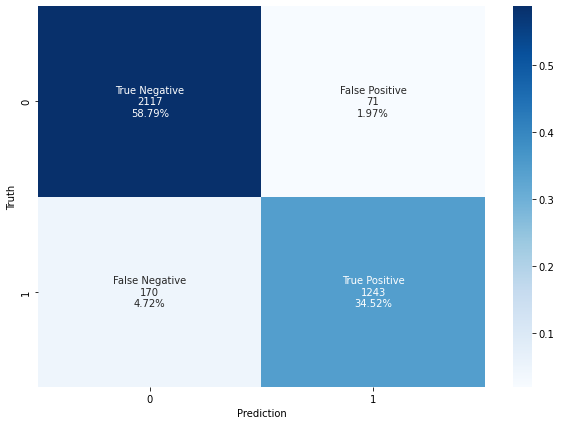

In [119]:
rate_classifier(spam_test_target, random_forest_classifier_predict)

Classification Report
               precision    recall  f1-score   support

         ham       0.94      0.94      0.94      2188
        spam       0.90      0.91      0.90      1413

    accuracy                           0.92      3601
   macro avg       0.92      0.92      0.92      3601
weighted avg       0.92      0.92      0.92      3601

Accuracy Score
 0.9244654262704805


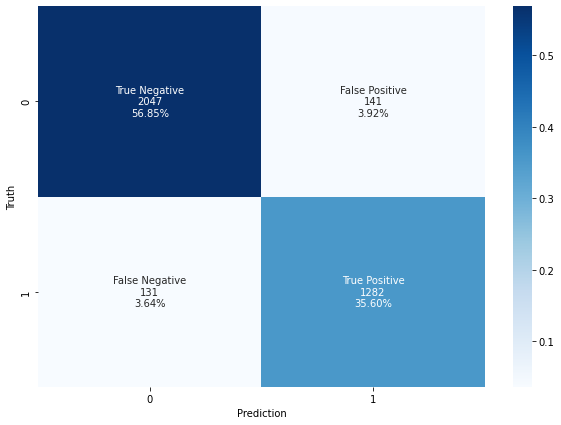

In [ ]:
rate_classifier(spam_test_target, majority_voting_classifier_predict)

The Majority Voting Classifier performed better than the ADA_Boost Classifier, with a higher accuracy and lower False Positive/Negative Rate